<a href="https://colab.research.google.com/github/mezkymy/ecommerce-ds/blob/dev/Final_Project_DS_Rakamin_Batch_31_Kelompok_4_(Cobra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load csv file, create raw data (original copy) and dataframe (df) to manipulate
raw_data = pd.read_csv('Train.csv')
df = raw_data.copy()
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 1. Data Exploration

Source: [E-Commerce Shipping Data from Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics)

## Context (copied from Kaggle):
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## 1.1 Descriptive Statistics Analysis

In [ ]:
# check columns and null/non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


No null values detected on every columns

In [ ]:
# check if any ID is duplicated
df[df['ID'].duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


<b>No duplicate ID detected.</b>

ID column can be dropped as it shall not be used in any further analysis.

In [ ]:
# drop ID column
df.drop('ID', axis=1, inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Terdapat sebuah kejanggalan pada feature `Discount_offered`, dimana nilai maksimalnya sebesar 65 sedangkan selisih jaraknya dengan Q3 (10) atau mean (13) sangat tinggi, sehingga diduga terdapat beberapa outliers

In [ ]:
# categorical columns
categoricals = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [ ]:
df[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Tidak terdapat kejanggalan pada Categorical Data karena setiap kolom memiliki jumlah data yang sama dengan jumlah total baris data dan tidak terdapat nilai yang tidak diharapkan seperti huruf atau karakter yang dianggap sebagai kejanggalan. 


## 1.2 Univariate Analysis


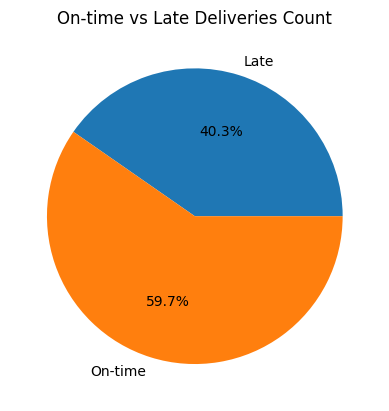

In [ ]:
# check ratio of on-time vs late deliveries
df.groupby('Reached.on.Time_Y.N').size().plot(kind='pie', labels=['Late', 'On-time'], autopct='%.1f%%')
plt.title('On-time vs Late Deliveries Count')
plt.show()

Diketahui bahwa proporsi pengiriman yang tepat waktu (On-time) sebesar 59,7% dan proporsi pengiriman yang terlambat (Late) sebesar 40,3%. Dapat disimpulkan bahwa sebagian besar pengiriman dilakukan tepat waktu, namun masih ada sebagian kecil pengiriman yang terlambat. Hal ini dapat menjadi fokus perbaikan untuk meningkatkan kualitas layanan dan kepuasan pelanggan.

Karena data sudah memiliki jumlah sampel yang cukup banyak dan tidak terlalu berbeda antara kelas satu dengan yang lain (tidak terlalu signifikan class imbalance-nya), maka tidak perlu dilakukan penyeimbangan lebih lanjut terhadap pada tahap pre-processing data.


In [ ]:
# function to calculate bins based on Freedman-Diaconis (not used for now)
def bins_fd(col):
    n = col.count()
    q1, q3 = col.quantile([0.25, 0.75])
    range_tc = col.max() - col.min()
    IQR = q3 - q1
    return int(round(np.ceil(((n ** (1/3)) * range_tc)/(2 * IQR)), 0))

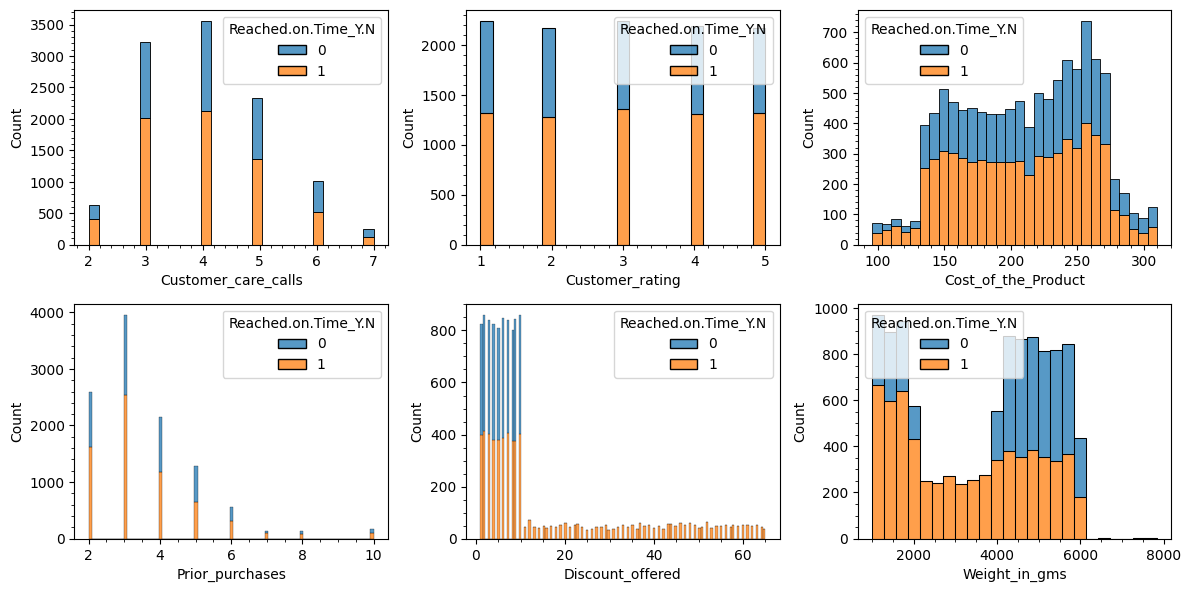

In [ ]:
# histogram for numeric columns
numeric_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

i = 0
for y in axes:
    for ax in y:
        column = numeric_columns[i]
        sns.histplot(df, x=column, hue='Reached.on.Time_Y.N', multiple='stack', ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

Pada fitur numerik terdapat beberapa hal yang menarik, diantaranya:
<!-- - Feature Prior_purchase membentuk positive skew
- Feature Weight_in_gms juga terdapat beberapa outlier pada nilai diatas 7500
- Feature Discount_offered terdapat nilai yang mendominasi yaitu pada nilai  0 - 10 -->

- Pada feature `Prior_purchase` membentuk positive skew
- Pada feature `Weight_in_gms` juga terdapat beberapa outlier pada nilai diatas 7500 (tidak terlalu terlihat pada grafik)
- Pada feature `Discount_offered`, terdapat nilai yang mendominasi yaitu pada nilai 0 - 10, dimana barang yang diberikan diskon di luar range tersebut <b>tidak ada satupun yang terlambat</b>


Saat data pre-processing, perlu dilakukan scaling pada data numerik agar mempunyai range yang seragam.

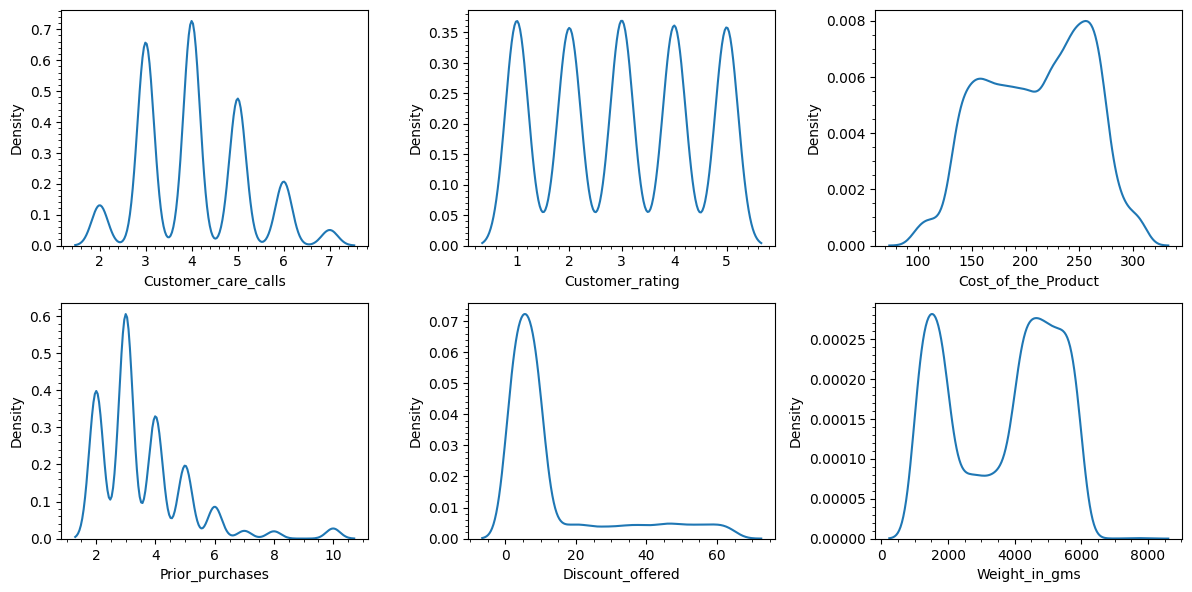

In [ ]:
# KDEplot for numeric columns (sebagai pembanding tampilan)
numeric_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

i = 0
for y in axes:
    for ax in y:
        column = numeric_columns[i]
        sns.kdeplot(df, x=column, ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

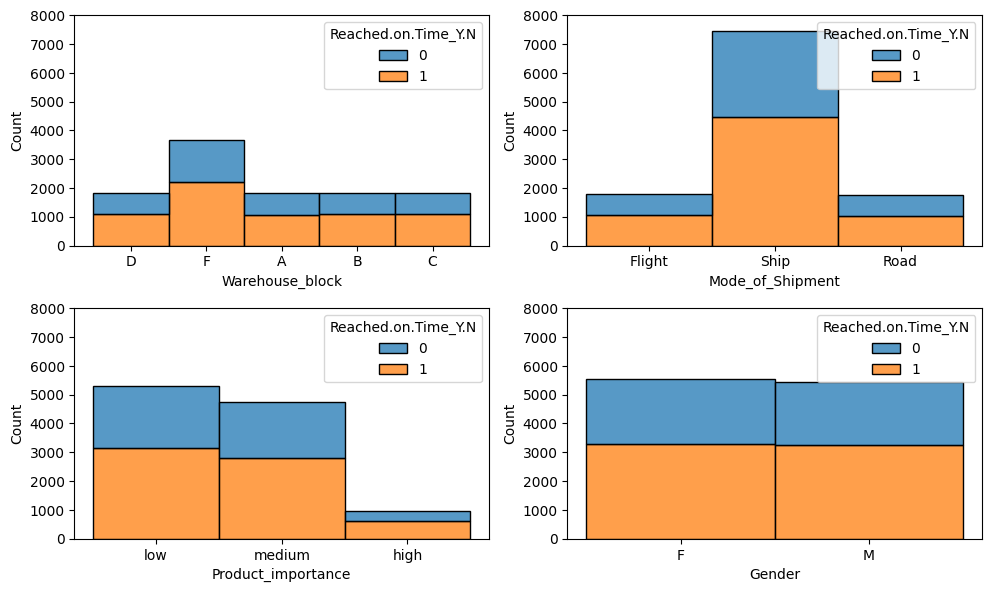

In [ ]:
# Create histplot for categorical columns
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
i = 0

for y in axes:
    for ax in y:
        try:
            column = categorical_columns[i]
        except:
            break
        sns.histplot(df, x=column, hue='Reached.on.Time_Y.N', multiple='stack', ax=ax) 
        ax.set_ylim(0, 8000)
        i += 1

fig.tight_layout(pad=1)
plt.show()

<!-- ### Insights based on histograms
1. Distribution of `Customer_care_calls` and `Cost_of_the_product` are relatively normal, while the distribution of `Prior_purchases` and `Discount_offered` are positively skewed
2. Distribution of `Weight_in_gms` shows two peaks (bimodal), which might indicate an existance of two categories/segmentations

### Insights based on count plots
1. Warehouse `F` stores the most amount of items, while other warehouses stores  similar amount of items
2. Most items are shipped using the mode `Ship` (around ~70% of total shipments) -->

- Berdasarkan warehouse, barang paling banyak disimpan/dilayani oleh Warehouse F, sedangkan warehouse lainnya kurang lebih menampung jumlah barang yang sama
- Mayoritas pengiriman dilakukan melalui jalur laut (Ship)
- Jumlah barang yang tingkat kepentingannya tinggi (high) relatif sedikit
- Jumlah customer pria hampir setara dengan jumlah customer wanita, dengan rasio keterlambatan yang juga serupa
- Beberapa hal yang harus ditindaklanjuti pada saat data pre-processing:
  - Untuk kolom `Gender`, dapat dilakukan mapping agar nilai "M" dan "F" menjadi 0 dan 1.
  - Untuk kolom `Product_importance`, dapat dilakukan label encoding karena kedua kolom tersebut memiliki nilai-nilai yang berurutan dan memiliki hubungan ordinal antara nilai-nilainya.
  - Untuk kolom `Warehouse_block` dan `Mode_of_Shipment`, dapat dilakukan one-hot encoding karena kolom tersebut tidak memiliki hubungan ordinal antara nilai-nilainya dan setiap nilai kategorikal dianggap sama pentingnya.




## 1.3 Multivariate Analysis

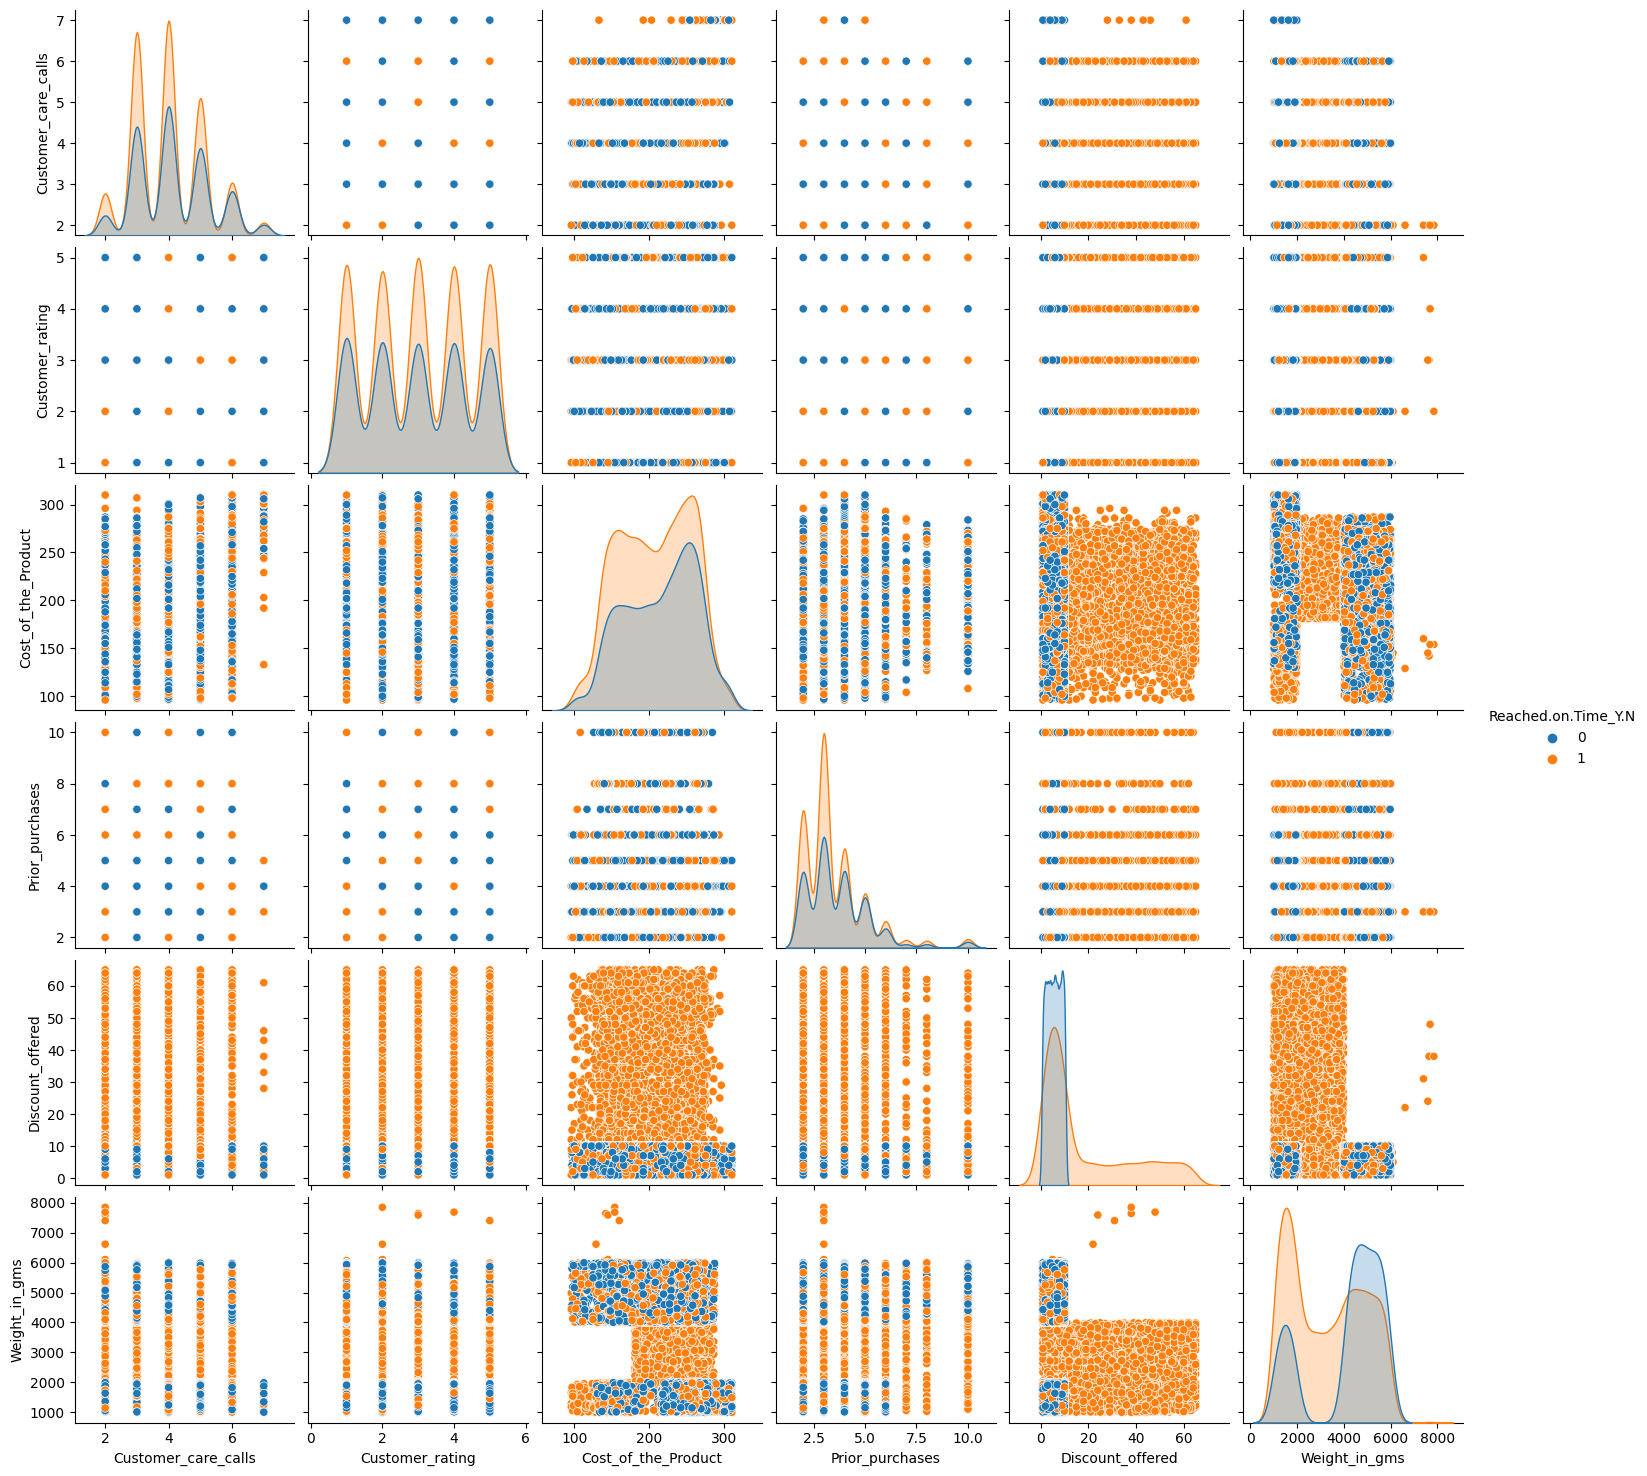

In [ ]:
# create pairplot for all numerical features
sns.pairplot(df, hue='Reached.on.Time_Y.N')
plt.show()

Terdapat segmentasi data yang secara visual cukup jelas terlihat pada beberapa pair plot. Secara visual, dapat diambil beberapa insight sebagai berikut:
- Pada discount offered terhadap weight, pada umumnya barang-barang yang beratnya di atas 4000 gram tidak diberikan diskon lebih besar dari 10% (kecuali untuk beberapa outlier).
- Tidak ditemukan barang terlambat pada barang yang diberikan diskon lebih dari 10%
- Barang dengan berat di antara 2000-4000 gram harganya ada di kisaran ~200 sampai ~300 dollar, dan tidak ada yang terlambat pengirimannya
- Terdapat beberapa data outlier jika dilihat berdasarkan berat barang (Weight_in_gms), yaitu barang-barang yang beratnya melebihi 6000 gram, namun untuk barang-barang tersebut tidak ada satupun yang mengalami keterlambatan
- Berdasarkan hasil korelasi antara feature, terdapat beberapa hal yang perlu dilakukan, yaitu:
  - Beberapa data outlier pada berat barang (Weight_in_gms) yang perlu diobservasi lebih lanjut untuk memastikan apakah data tersebut valid atau tidak. Jika data tersebut valid, maka dapat dipertimbangkan untuk menggunakan teknik pre-processing seperti pengurangan dimensi (PCA) atau penanganan outlier untuk memperbaiki performa model.


### Insight Customer Care Calls
Semakin tinggi persentase keterlambatan pengiriman, semakin banyak jumlah customer care calls yang diterima oleh perusahaan.

Hal tersebut menunjukkan bahwa keterlambatan pengiriman dapat mempengaruhi kepuasan pelanggan, sehingga pelanggan perlu menghubungi customer care untuk mendapatkan informasi lebih lanjut mengenai status pengiriman.


In [ ]:
# # menambahkan grafik (MUFID)
# ax = sns.countplot(x=df['Prior_purchases'], hue=df['Reached.on.Time_Y.N'], palette={0: 'lightblue', 1: 'blue'})
# total = len(df['Prior_purchases'])

# # for p in ax.patches:
# #     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
# #     x = p.get_x() + p.get_width() / 2 - 0.05
# #     y = p.get_y() + p.get_height() + 10
# #     ax.annotate(percentage, (x, y), size = 7)

# plt.suptitle('Perbandingan Prior Purchase On Time dan Terlambat', y=1, fontsize=16)
# plt.title('Lebih dari 50% barang dari setiap Prior Purchase mengalami keterlambatan (mungkin bisa dijadikan business metrics)', fontsize=10)

# plt.show()

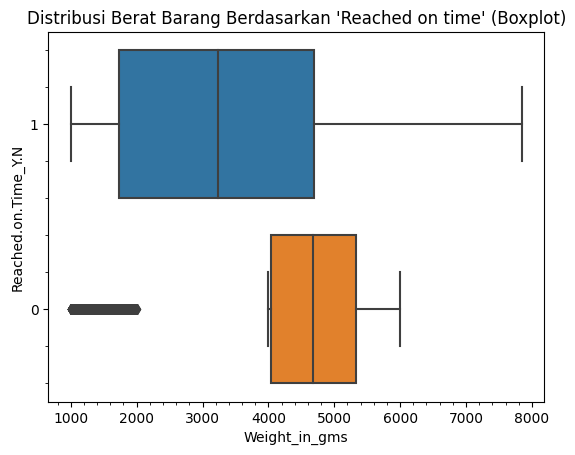

In [ ]:
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Weight_in_gms", y="Reached.on.Time_Y.N").set(title="Distribusi Berat Barang Berdasarkan 'Reached on time' (Boxplot)")

plt.minorticks_on()
plt.show()

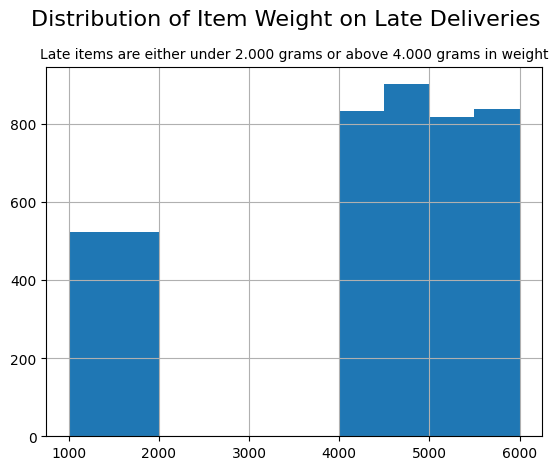

In [ ]:
df[df['Reached.on.Time_Y.N'] == 0].hist(column = "Weight_in_gms")
plt.suptitle('Distribution of Item Weight on Late Deliveries', y=1, fontsize=16)
plt.title('Late items are either under 2.000 grams or above 4.000 grams in weight', fontsize=10)
plt.show()

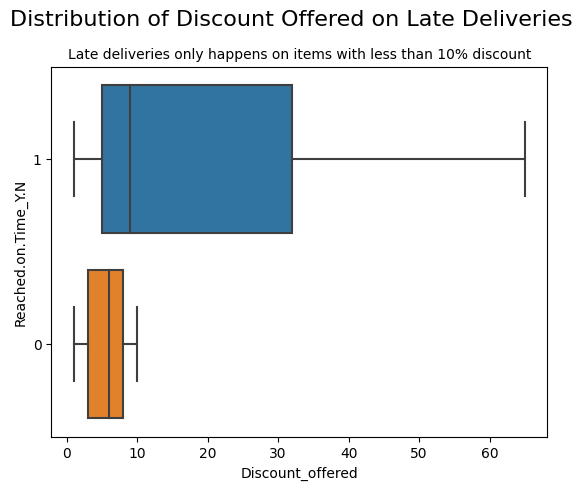

In [ ]:
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Discount_offered", y='Reached.on.Time_Y.N')
plt.suptitle('Distribution of Discount Offered on Late Deliveries', y=1, fontsize=16)
plt.title('Late deliveries only happens on items with less than 10% discount', fontsize=10)
plt.show()

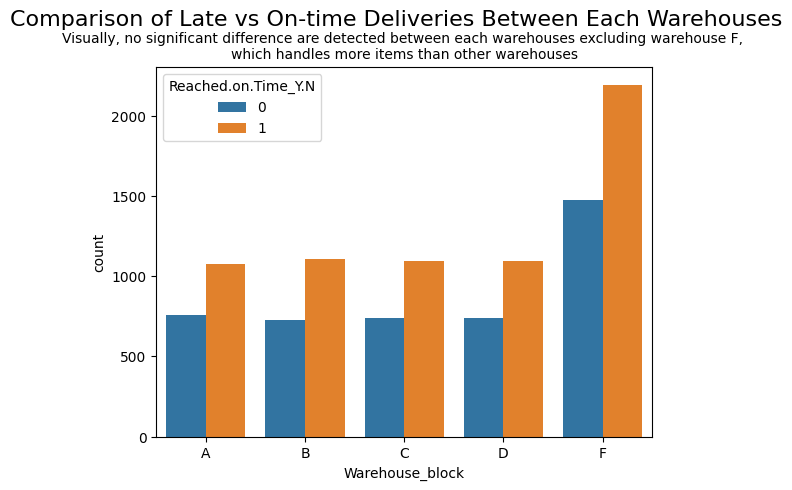

In [ ]:
sns.countplot(data=df, x="Warehouse_block", order=['A', 'B', 'C', 'D', 'F'], hue="Reached.on.Time_Y.N")
plt.suptitle('Comparison of Late vs On-time Deliveries Between Each Warehouses', y=1, fontsize=16)
plt.title(f'Visually, no significant difference are detected between each warehouses excluding warehouse F, \nwhich handles more items than other warehouses', fontsize=10)
plt.show()

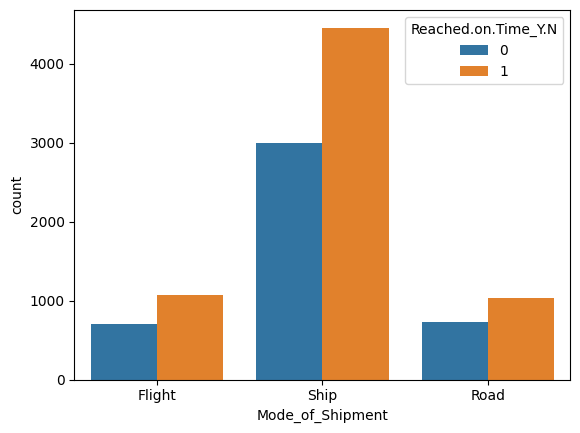

In [ ]:
sns.countplot(data=df, x="Mode_of_Shipment", hue="Reached.on.Time_Y.N")
plt.show()

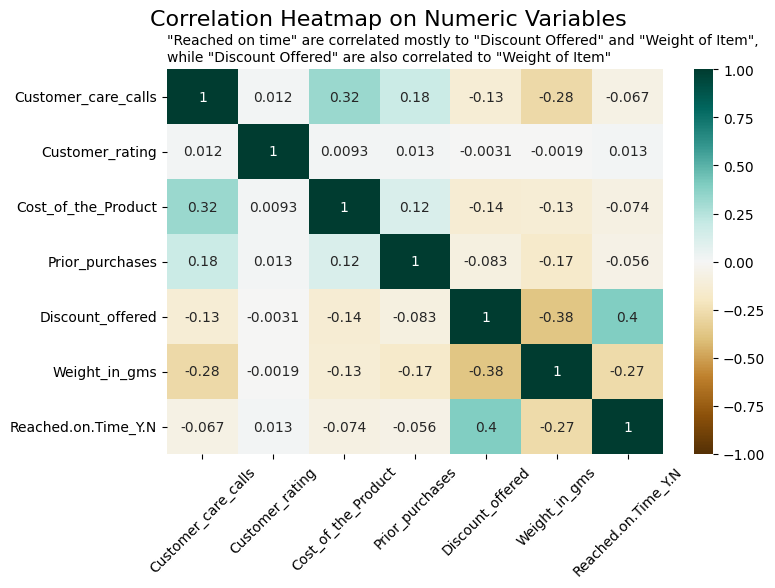

In [ ]:
# correlation heatmap with pearson
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2g')
plt.xticks(rotation = 45)
plt.suptitle('Correlation Heatmap on Numeric Variables', horizontalalignment='right', x=0.7, y=1, fontsize=16)
plt.title(f'"Reached on time" are correlated mostly to "Discount Offered" and "Weight of Item", \nwhile "Discount Offered" are also correlated to "Weight of Item"', loc='left', fontsize=10)

plt.show()

<!-- - Discount_offered dengan Reached.on.Time_Y.N berkorelasi sedang positif, sedangkan Weight_in_gms dengan Reached.on.Time_Y.N berkorelasi lemah negatif
- Discount_offered dengan Weight_in_gms berkorelasi sedang negatif (diduga dapat mengakibatkan multikolinearitas)
- Cost_of_the_Product dengan Customer_care_calls berkorelasi sedang positif -->

Berdasarkan hasil heatmap yang dibuat korelasi antar feature beragam dengan range 1 sampai -1. Semakin mendekati 1 atau -1 maka korelasi semakin kuat, sedangkan semakin mendekati 0 maka korelasi semakin lemah. Beberapa nilai korelasi yang paling relevan adalah sebagai berikut:

- `Discount_offered` dengan `Reached.on.Time_Y.N` berkorelasi sedang positif, sedangkan `Weight_in_gms` dengan `Reached.on.Time_Y.N` berkorelasi lemah negatif
- `Discount_offered` dengan `Weight_in_gms` berkorelasi sedang negatif (dapat mengakibatkan multikolinearitas pada model linear)
- `Cost_of_the_Product` dengan `Customer_care_calls` berkorelasi sedang positif
`Customer_rating` memiliki korelasi yang sangat kecil terhadap seluruh fitur lainnya, termasuk keterlambatan pengiriman

- Berdasarkan hasil korelasi antara feature, terdapat beberapa hal yang perlu dilakukan, yaitu:

  - `Discount_offered` dan `Weight_in_gms` memiliki korelasi yang cukup signifikan, sehingga perlu dilakukan pengecekan terhadap adanya multikolinearitas antara kedua feature tersebut. Jika ditemukan adanya multikolinearitas, salah satu feature dapat dihapus atau digabungkan dengan feature lain.

  - Korelasi antara `Cost_of_the_Product` dengan `Customer_care_calls` perlu diperhatikan pada saat modelling. Jika terdapat multikolinearitas, feature yang memiliki korelasi lebih rendah dengan target (`Reached.on.Time_Y.N`) dapat dihapus atau digabungkan dengan feature lain.

  - Feature yang memiliki korelasi rendah dengan target (`Reached.on.Time_Y.N`) namun memiliki korelasi yang tinggi dengan feature lain juga perlu diperhatikan pada saat modelling. Pada beberapa kasus, feature tersebut mungkin dapat dihapus atau digabungkan dengan feature lain untuk menghindari multikolinearitas dan meningkatkan akurasi model.



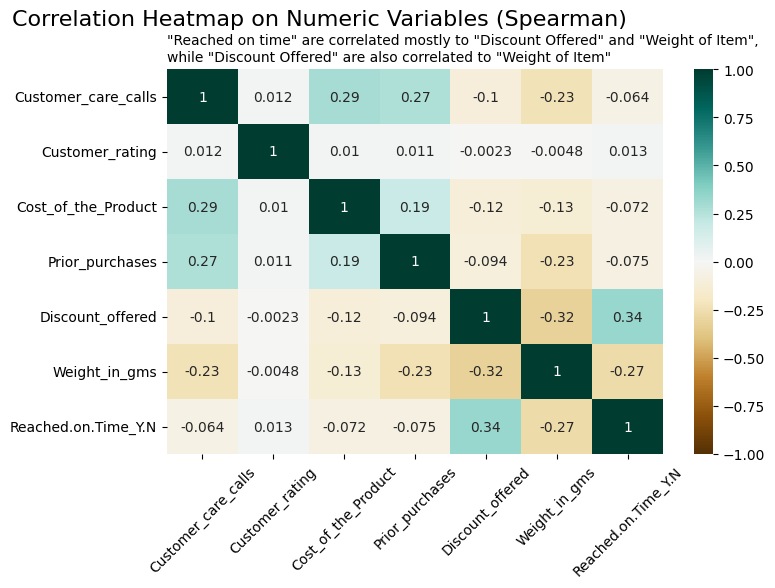

In [ ]:
# correlation with spearman
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2g')
plt.xticks(rotation = 45)
plt.suptitle('Correlation Heatmap on Numeric Variables (Spearman)', horizontalalignment='right', x=0.7, y=1, fontsize=16)
plt.title(f'"Reached on time" are correlated mostly to "Discount Offered" and "Weight of Item", \nwhile "Discount Offered" are also correlated to "Weight of Item"', loc='left', fontsize=10)

plt.show()

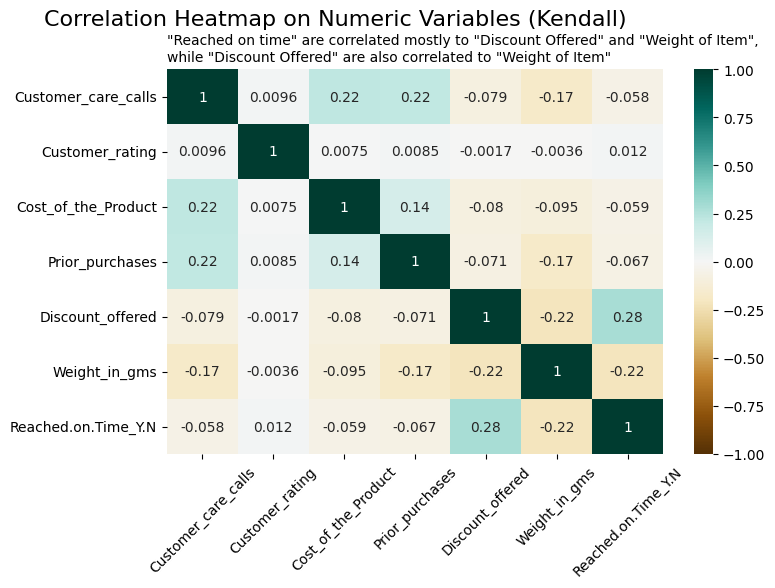

In [ ]:
# correlation with kendall
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(method='kendall', numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2g')
plt.xticks(rotation = 45)
plt.suptitle('Correlation Heatmap on Numeric Variables (Kendall)', horizontalalignment='right', x=0.7, y=1, fontsize=16)
plt.title(f'"Reached on time" are correlated mostly to "Discount Offered" and "Weight of Item", \nwhile "Discount Offered" are also correlated to "Weight of Item"', loc='left', fontsize=10)

plt.show()

In [ ]:
# coba - coba
df.groupby('Mode_of_Shipment').agg({'Weight_in_gms' : 'mean'})

,Weight_in_gms
Mode_of_Shipment,
Flight,3629.378165
Road,3649.550568
Ship,3631.457518


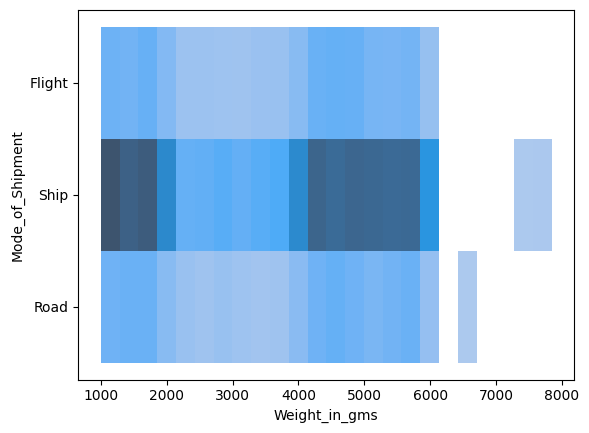

In [ ]:
# coba - coba
sns.histplot(x='Weight_in_gms', y='Mode_of_Shipment', data=df)
plt.show()

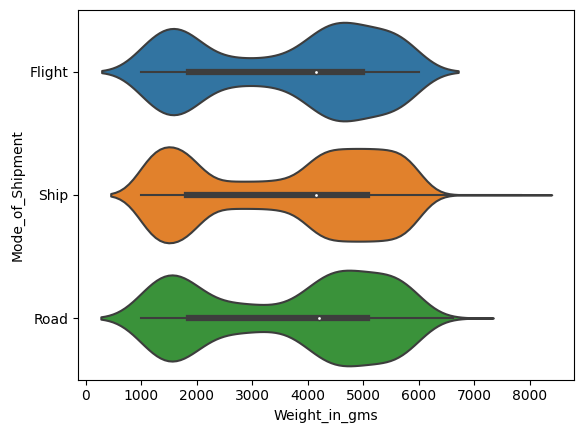

In [ ]:
# coba ganti grafik (MUFID)
sns.violinplot(x='Weight_in_gms', y='Mode_of_Shipment', data=df)
plt.show()

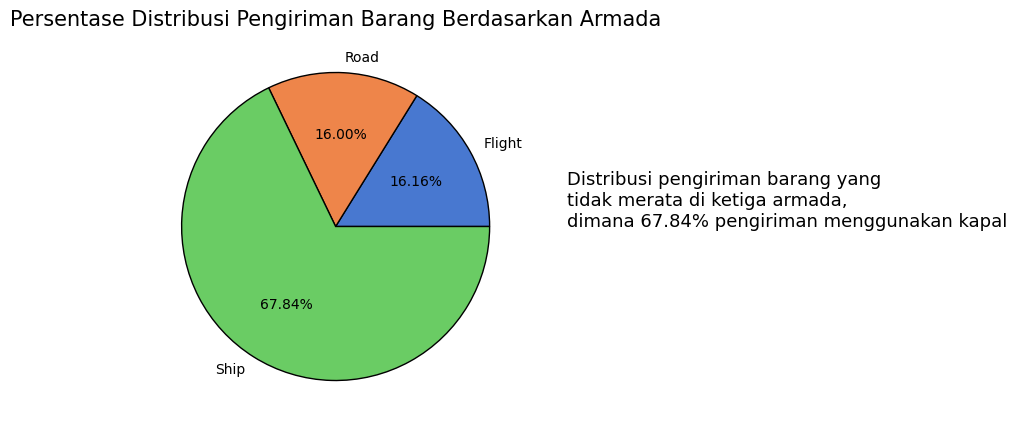

In [ ]:
# Filtering Kolom
# Kode perlu di refactor karena ID sudah di drop #done
total = df.groupby('Mode_of_Shipment').agg({'Weight_in_gms' : 'count'}).reset_index()
total['rasio'] = round(total['Weight_in_gms']*100/10999, 2)

# Visualisasi Data
plt.figure(figsize=(10,5))
plt.pie(total['rasio'], labels=total['Mode_of_Shipment'], colors=sns.color_palette('muted'),
          wedgeprops={'edgecolor':'k'}, autopct='%.2f%%')

# Judul
plt.title('Persentase Distribusi Pengiriman Barang Berdasarkan Armada', fontsize=15)

# Keterangan
plt.text(x=1.5, y=0, s='Distribusi pengiriman barang yang\ntidak merata di ketiga armada,\ndimana 67.84% pengiriman menggunakan kapal', fontsize=13)
plt.show()

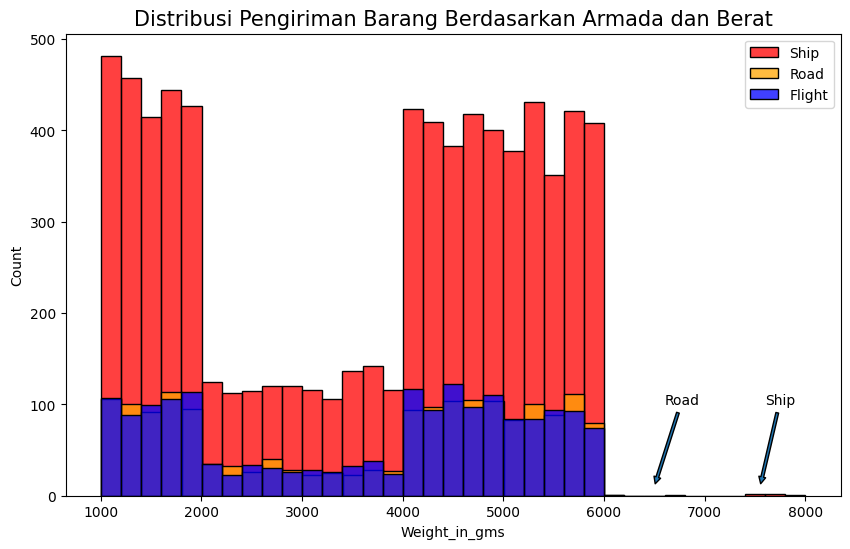

In [ ]:
#Filtering Kolom
flight = df[df['Mode_of_Shipment']=='Flight']
ship = df[df['Mode_of_Shipment']=='Ship']
road = df[df['Mode_of_Shipment']=='Road']

#Visualisasi Distribusi Barang
plt.figure(figsize=(10,6))
sns.histplot(x='Weight_in_gms', binwidth=200, color='red', data=ship, label='Ship')
sns.histplot(x='Weight_in_gms', binwidth=200, color='orange', data=road, label='Road')
sns.histplot(x='Weight_in_gms', binwidth=200, color='blue', data=flight, label='Flight')

#Judul
plt.title('Distribusi Pengiriman Barang Berdasarkan Armada dan Berat', fontsize=15)

#Keterangan Tambahan
plt.annotate('Road',
            xy=(6500,10), xytext=(6600, 100), arrowprops=dict(ec='black', arrowstyle='simple',))
plt.annotate('Ship',
            xy=(7550,10), xytext=(7600, 100), arrowprops=dict(ec='black', arrowstyle='simple',))

#Legenda
plt.legend(loc=1)
plt.show()

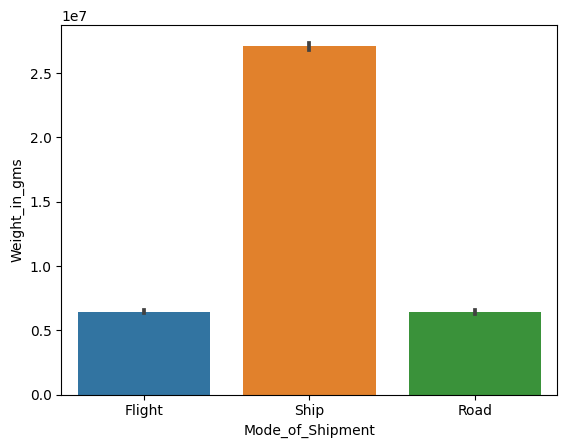

In [ ]:
# coba - coba
sns.barplot(x='Mode_of_Shipment', y='Weight_in_gms', estimator=sum, data=df)
plt.show()

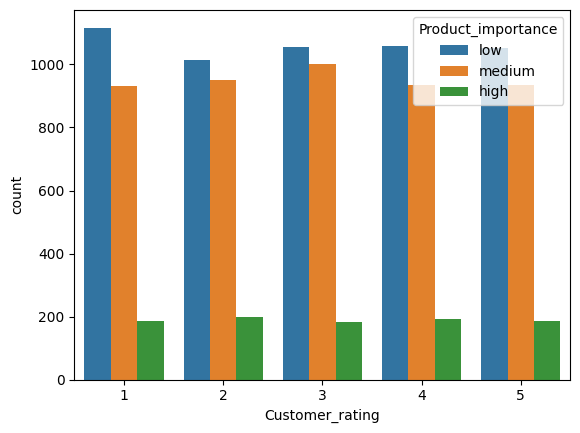

In [ ]:
sns.countplot(data=df, x="Customer_rating", hue="Product_importance")
plt.show()

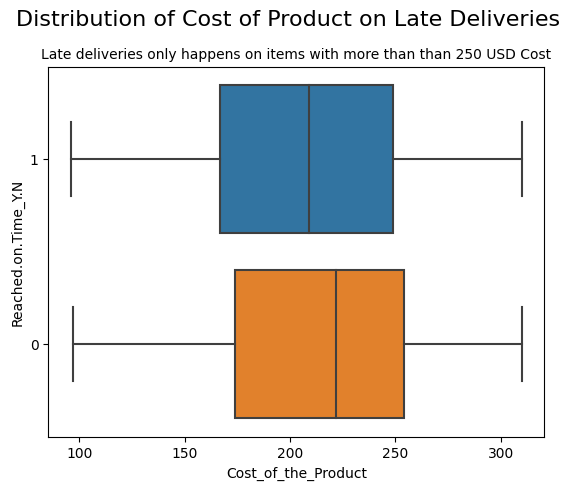

In [ ]:
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Cost_of_the_Product", y='Reached.on.Time_Y.N')
plt.suptitle('Distribution of Cost of Product on Late Deliveries', y=1, fontsize=16)
plt.title('Late deliveries only happens on items with more than than 250 USD Cost', fontsize=10) # kesimpulan kurang tepat?
plt.show()

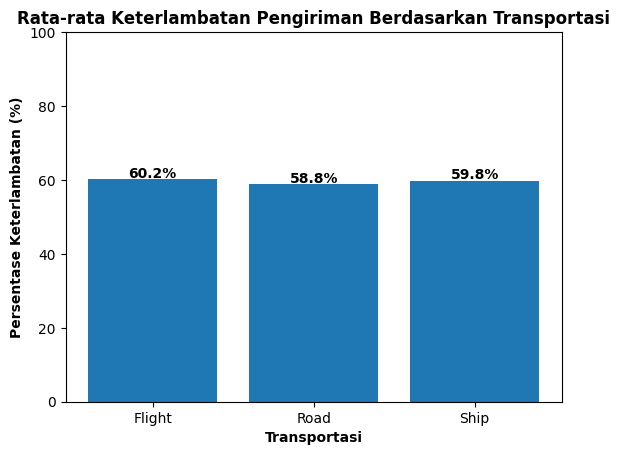

In [ ]:
# Calculate late delivery percentage for each mode of transport
delay_by_shipment = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean() * 100

# Membuat bar plot
plt.bar(delay_by_shipment.index, delay_by_shipment.values)

# Menambahkan label untuk setiap bar
for i, v in enumerate(delay_by_shipment.values):
    plt.text(i, v+0.5, str(round(v,1)) + '%', ha='center', fontweight='bold')

# Menambahkan label pada sumbu x dan y, serta judul grafik
plt.title('Rata-rata Keterlambatan Pengiriman Berdasarkan Transportasi', fontweight='bold')
plt.xlabel('Transportasi', fontweight='bold')
plt.ylabel('Persentase Keterlambatan (%)', fontweight='bold')
plt.ylim(0, 100)

# Menampilkan grafik
plt.show()

### Insight:

Pengiriman melalui penerbangan memiliki tingkat keterlambatan pengiriman yang lebih tinggi dibandingkan pengiriman melalui kapal atau jalan darat.


### Rekomendasi Bisnis:

Evaluasi ulang pengiriman melalui penerbangan, pertimbangkan opsi pengiriman alternatif seperti kapal atau jalan darat, atau tingkatkan kualitas layanan pengiriman melalui penerbangan.
<br>
<br>

<i>catatan (mmy): insight dan kesimpulan rasanya kurang tepat, karena justru dari grafik yang terlihat adalah bahwa tiap moda memiliki rasio keterlambatan yang kurang lebih sama</i>

# 2. Data Pre-Processing

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

## 2.1 Data Cleansing

In [ ]:
# split data into features & target
target = 'Reached.on.Time_Y.N'
features = df.loc[:, df.columns != target].columns
x_data = df[features]
y_data = df[target]

In [ ]:
# split data menjadi 80% data train dan 20% data test

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=25, stratify=y_data)

# check amount of data on train and test
print('banyaknya data train =', x_train.shape[0])
print('banyaknya data test =', x_test.shape[0])

# check if split is balanced based on target value
print('mean value of y on train =', y_train.mean())
print('mean value of y on test =', y_test.mean())

banyaknya data train = 8799
banyaknya data test = 2200
mean value of y on train = 0.5966587112171837
mean value of y on test = 0.5968181818181818


### 2.1.1 Handle missing values, duplicated data, dan outliers

Dari Bagian 1.1 (<i>Descriptive Statistics Analytics</i>), diketahui bahwa data <b>tidak memiliki missing value maupun data duplikat</b>. 

In [ ]:
# memeriksa outlier dari tiap kolom numerik menggunakan zscore test
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

zscore = pd.DataFrame()
outlier = pd.DataFrame()
filtered_zscore = np.array([True] * len(x_train))

for col in nums:
    zscore = abs(stats.zscore(x_train[col])) # hitung absolute z-scorenya
    outlier[col] = x_train[col][zscore>3]
    filtered_zscore = (zscore < 3) & filtered_zscore 

outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 7930 to 453
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  0 non-null      float64
 1   Customer_rating      0 non-null      float64
 2   Cost_of_the_Product  0 non-null      float64
 3   Prior_purchases      151 non-null    int64  
 4   Discount_offered     2 non-null      float64
 5   Weight_in_gms        0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 8.3 KB


In [ ]:
# kalau mau drop outlier menggunakan zscore
# kalo nggak pake zscore, jgn di run cell ini! dan cukup 1x 
print(f'jumlah baris SEBELUM filter outlier: {len(x_train)}')

x_train = x_train[filtered_zscore]
print(f'jumlah baris SETELAH filter outlier: {len(x_train)}')

jumlah baris SEBELUM filter outlier: 8799
jumlah baris SETELAH filter outlier: 8537


Berdasarkan uji, nilai zscore > 3 dianggap sebagai outlier. Kolom yang memiliki outlier adalah `Prior_purchases` dan `Discount_offered`. 

In [ ]:
# memeriksa outlier dari tiap kolom numerik menggunakan IQR
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

outlier_iqr = pd.DataFrame()
filtered_IQR = np.array([True] * len(x_train))

for col in nums:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 2) ## changed modifier to 2 to increase min and max range
    high_limit = Q3 + (IQR * 2) ## changed modifier to 2 to increase min and max range
    outlier_iqr[col] = x_train[col][(df[col] < low_limit) | (df[col] > high_limit)]
    filtered_IQR = ((x_train[col] >= low_limit) & (x_train[col] <= high_limit)) & filtered_IQR

outlier_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 2068 to 7661
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  0 non-null      float64
 1   Customer_rating      0 non-null      float64
 2   Cost_of_the_Product  0 non-null      float64
 3   Prior_purchases      362 non-null    int64  
 4   Discount_offered     85 non-null     float64
 5   Weight_in_gms        0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 19.8 KB


In [ ]:
# kalau mau drop outlier menggunakan IQR
# kalo nggak pake zscore, jgn di run cell ini! dan cukup 1x 
print(f'jumlah baris SEBELUM filter outlier: {len(x_train)}')

x_train = x_train[filtered_IQR]
print(f'jumlah baris SETELAH filter outlier: {len(x_train)}')

Jika penentuan outlier menggunakan basis z-score, 151 data merupakan data outlier berdasarkan `Prior_purchases` dan `Discount_offered`nya (sekitar 2% dari keseluruhan data train), sedangkan jika menggunakan IQR yang dimodifikasi (konstanta batas atas dan bawah diubah dari 1.5 menjadi 2.0), maka terdapat 362 data yang merupakan outlier (sekitar 4.2% dari data train). 

Karena jumlah outlier tidak terlalu banyak dan data yang tersisa masih cukup banyak, maka data outlier dapat dihapus jika memang dirasa tidak diperlukan.

In [ ]:
# remove outliers (example, based on iqr)
# not done yet

### 2.1.2 Feature Transformation

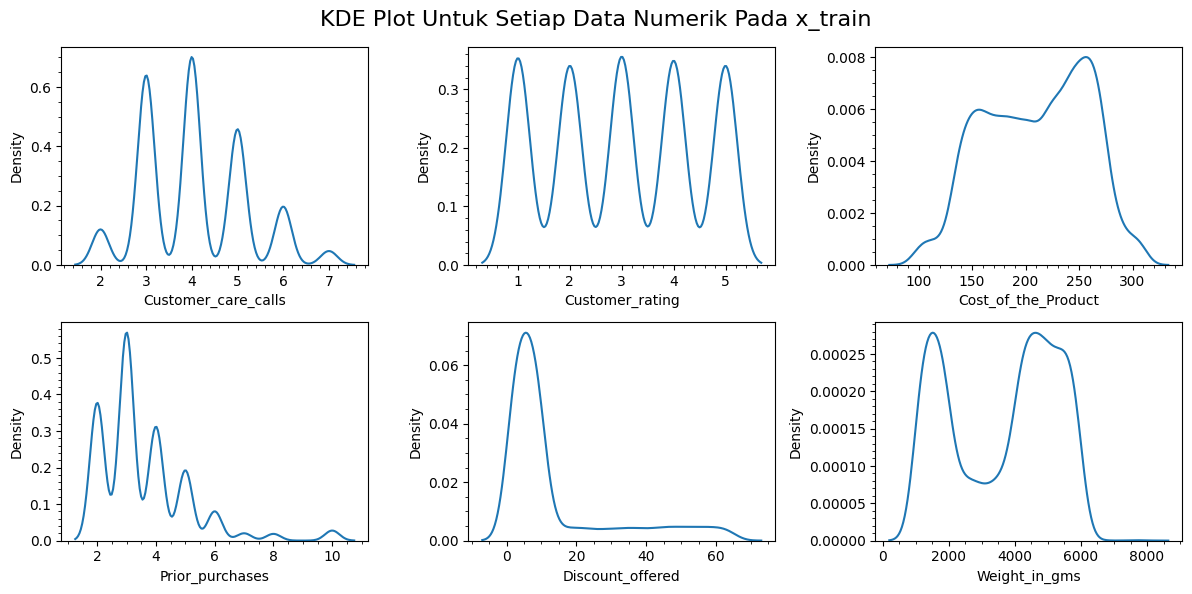

In [ ]:
# Tinjau distribusi dari kolom-kolom numerik pada data menggunakan kdeplot dari data yang telah di smoothing
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('KDE Plot Untuk Setiap Data Numerik Pada x_train', fontsize=16)

i = 0
for y in axes:
    for ax in y:
        column = nums[i]
        sns.kdeplot(x_train, x=column, ax=ax)
        ax.minorticks_on()
        i += 1


fig.tight_layout(pad=1)
plt.show()

In [ ]:
# menghitung derajat skewness dari tiap data numerik
from scipy.stats import skew

skew_score = []                          
for i in nums:
  skew_score.append(round(skew(x_train[i]),3))

df_skewness = pd.DataFrame({'fitur':nums, 'derajat skewness':skew_score})
df_skewness

,fitur,derajat skewness
0,Customer_care_calls,0.391
1,Customer_rating,0.002
2,Cost_of_the_Product,-0.170
3,Prior_purchases,0.999
4,Discount_offered,1.832
5,Weight_in_gms,-0.254


Setelah meninjau hasil kdeplot dan derajat skewness nya, kolom `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, dan `Weight_in_gms` dapat diasumsikan memiliki distribusi yang normal. Sehingga akan dilakukan transformasi untuk fitur lainnya yaitu `Prior_purchases` dan `Discount_offered`.

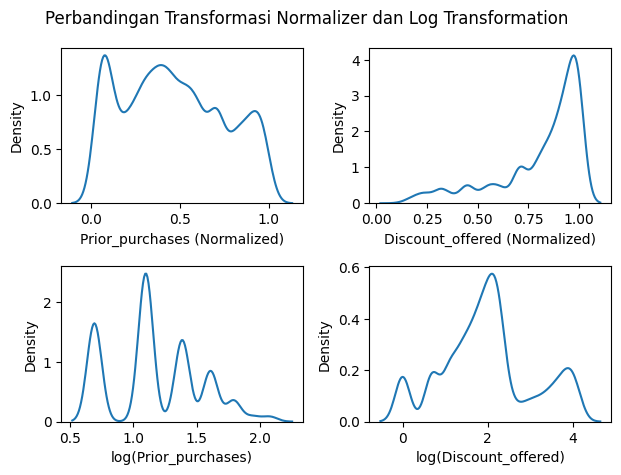

In [ ]:
# Lakukan transformasi untuk menormalkan Prior_purchases dan Discount_offered, gunakan Normalizer dan Log Transformation

col = ['Prior_purchases', 'Discount_offered']

x_norm = Normalizer().fit_transform(x_train[col].values.reshape(len(x_train),2))
x_log = np.log(x_train[col])

plt.subplot(2, 2, 1)
sns.kdeplot(x_norm[:,0])
plt.xlabel('Prior_purchases (Normalized)')

plt.subplot(2, 2, 2) 
sns.kdeplot(x_norm[:,1])
plt.xlabel('Discount_offered (Normalized)')

plt.subplot(2, 2, 3) 
sns.kdeplot(x_log['Prior_purchases'])
plt.xlabel('log(Prior_purchases)')

plt.subplot(2, 2, 4) 
sns.kdeplot(x_log['Discount_offered'])
plt.xlabel('log(Discount_offered)')

plt.suptitle('Perbandingan Transformasi Normalizer dan Log Transformation')
plt.tight_layout()
plt.show()

In [ ]:
# Periksa skewness setelah transformasi

df_skewness = pd.DataFrame({'fitur':col, 
                            'skewness awal': skew(x_train[col]),
                            'skewness normalizer': skew(x_norm),
                            'skewness log': skew(x_log)})
df_skewness

,fitur,skewness awal,skewness normalizer,skewness log
0,Prior_purchases,0.999257,0.191774,0.217800
1,Discount_offered,1.832282,-1.367522,0.209318


Dari nilai derajat skewness di atas, dapat dipilih transformasi Normalizer untuk `Prior_purchases` dan Log Transformation untuk `Discount_offered`.


Selanjutnya lakukan juga scaling untuk semua data numerik menggunakan MinMaxScaler. 

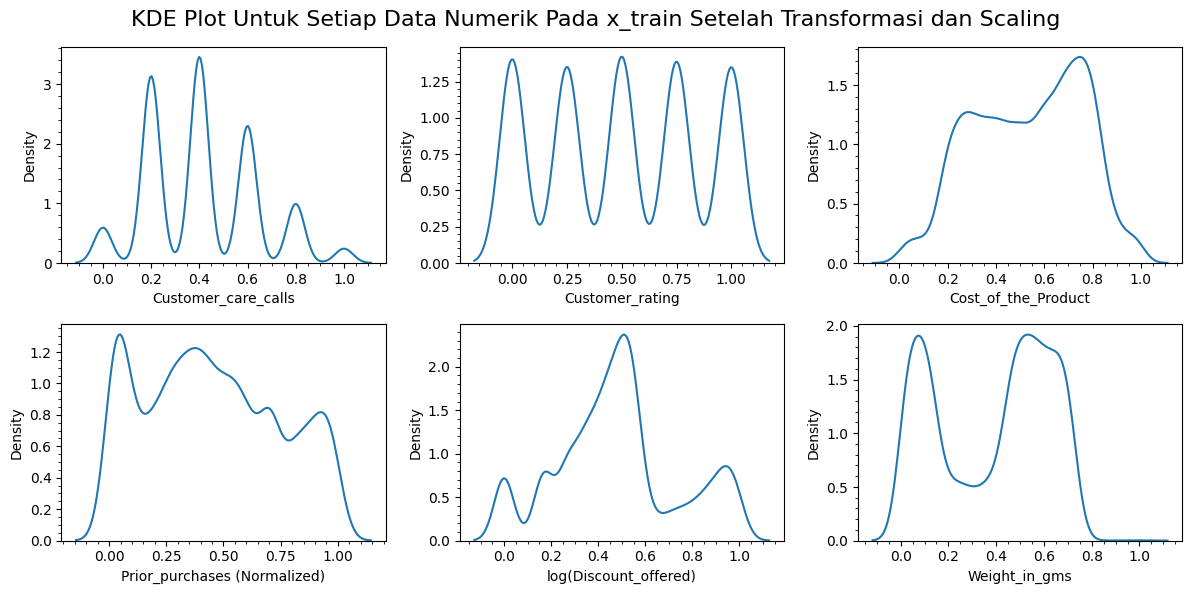

In [ ]:
# KDEplot data numerik setelah transformasi + scaling

x_train_transform = x_train.copy()
x_train_transform['Prior_purchases'] = x_norm[:,0]
x_train_transform['Discount_offered'] = x_log['Discount_offered']
x_train_transform[nums] = MinMaxScaler().fit_transform(x_train_transform[nums].values.reshape(x_train[nums].shape))

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

i = 0
for y in axes:
    for ax in y:
        column = nums[i]
        sns.kdeplot(x_train_transform, x=column, ax=ax)
        ax.minorticks_on()
        i += 1

axes[1,0].set_xlabel('Prior_purchases (Normalized)')
axes[1,1].set_xlabel('log(Discount_offered)')
fig.suptitle('KDE Plot Untuk Setiap Data Numerik Pada x_train Setelah Transformasi dan Scaling', fontsize=16)
fig.tight_layout(pad=1)
plt.show()

In [ ]:
# ## Test Standardization
# x_train_transform2 = x_train.copy()
# x_train_transform2[col] = StandardScaler().fit_transform(x_train_transform2[col].values.reshape(len(x_train),2))
# x_train_transform2[nums] = MinMaxScaler().fit_transform(x_train_transform2[nums].values.reshape(x_train[nums].shape))

In [ ]:
# ## Test Standardization
# fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# i = 0
# for y in axes:
#     for ax in y:
#         column = nums[i]
#         sns.kdeplot(x_train_transform2, x=column, ax=ax)
#         ax.minorticks_on()
#         i += 1

# fig.tight_layout(pad=1)
# plt.show()

In [ ]:
# # OLog Transformation jika melakukan Standardization
# plt.subplot(2, 1, 1)
# y1 = x_train['Prior_purchases']
# sns.kdeplot(np.log(y1))

# plt.subplot(2, 1, 2) 
# y2 = x_train['Discount_offered']
# sns.kdeplot(np.log(y2))

# plt.tight_layout()
# plt.show()

In [ ]:
x_train = x_train_transform

### 2.1.3 Feature Encoding

In [ ]:
# OHE = 'Warehouse_block', 'Mode_of_Shipment' => bisa pakai sklearn onehotencoder
for cat in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(x_train[cat], prefix=cat)
    x_train = x_train.join(onehots)
x_train.drop(['Warehouse_block_F', 'Mode_of_Shipment_Ship'], axis=1, inplace=True)

# Binary = 'Gender' => bisa pakai sklearn labelencoder
mapping_gender = {'F' : 0, 'M' : 1}
x_train['gender_map'] = x_train['Gender'].map(mapping_gender)

# Ordinal/Label = 'Product_importance' => bisa pakai sklearn ordinalencoder
mapping_product_importance = {'low' : 0, 'medium' : 1, 'high' :2}
x_train['product_importance_map'] = x_train['Product_importance'].map(mapping_product_importance)

# drop original column
x_train.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1, inplace=True)
x_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,gender_map,product_importance_map
2068,5,4,178,7,36,1179,0,0,1,0,1,0,0,1
4011,2,4,238,3,4,5782,0,1,0,0,0,0,1,1
2836,4,1,151,2,47,1682,0,0,1,0,0,0,0,0
6785,4,3,189,2,7,4765,0,0,0,0,0,0,0,0
2562,4,3,191,3,45,3714,0,0,0,1,0,0,0,2


### Label Encoding (with Sklearn)

In [ ]:
# Label Encoder
label_encoder = preprocessing.LabelEncoder()
x_train['Gender_map']= label_encoder.fit_transform(x_train['Gender'])
x_train['Gender_map'].unique()

NameError: ignored

In [ ]:
# One Hot Encoder

OHE = preprocessing.OneHotEncoder()
data_OHE_blok = OHE.fit_transform(x_train[['Warehouse_block']]).toarray()
df_OHE_blok = pd.DataFrame(data_OHE_blok, columns=['Blok_' + i for i in OHE.categories_[0]])
x_train = pd.concat([x_train, df_OHE_blok], axis=1)

OHE = preprocessing.OneHotEncoder()
data_OHE_mode = OHE.fit_transform(x_train[['Mode_of_Shipment']]).toarray()
df_OHE_mode = pd.DataFrame(data_OHE_mode, columns=['metode_' + str(i) for i in OHE.categories_[0]])
x_train = pd.concat([x_train, df_OHE_mode], axis=1)

In [ ]:
# Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder


# create a subset of the data with only the 'pekerjaan' column
urutan = ['low', 'medium', 'high']

# Inisialisasi encoder
orde = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[urutan])

# fit and transform OrdinalEncoder to the 'pekerjaan' column
x_train['product'] = orde.fit_transform(x_train[['Product_importance']])

In [ ]:
x_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'gender_map', 'product_importance_map'],
      dtype='object')

Setelah melakukan encoding, beberapa kolom kategorikal pada data train diubah menjadi beberapa kolom untuk mempermudah pembentukan model
1. `Warehouse_block` diubah menjadi 4 kolom menggunakan One-Hot Encoding
2. `Mode_of_Shipment` diubah menjadi 2 kolom menggunakan One-Hot Encoding
3. `gender` diubah menjadi kolom binary, dimana 0 = Female dan 1 = Male
4. `product_importance` diubah menjadi kolom ordinal, dimana 0 = low, 1 = medium, dan 2 = high 

### Data test Preprocessing (kayaknya masih ada yang salah)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

x_test_transform = x_test.copy()

def feature_transform (x_test):
  '''
  Transform the features of x_test by scaling them using Normalizer, MinMaxScaler, Log

  '''
  scaler = MinMaxScaler()
  # feature yang ditransform 
  # x_test_transform['Prior_purchases'] = Normalizer().fit_transform(x_test['Prior_purchases'].values.reshape(len(x_test)).reshape(-1, 1)) #ini masih salah, nilainya malah jadi ilang
  # x_test_transform['Prior_purchases'] = Normalizer().fit_transform(x_test['Prior_purchases'].values.reshape(-1, 1))
  x_test_transform['Prior_purchases'] = Normalizer().fit_transform(x_test['Prior_purchases'].values.reshape(len(x_test), 1))
  x_test_transform['Discount_offered'] = np.log(x_test['Discount_offered'])

  # feature numeric di-scaling 
  nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product','Prior_purchases', 'Discount_offered', 'Weight_in_gms'] #kolom 'Prior_purchases' ga usah di MinMax lagi
  x_test_transform[nums] = MinMaxScaler().fit_transform(x_test_transform[nums].values.reshape(x_test_transform[nums].shape))

  # return 
  return x_test_transform

In [ ]:
# Gunakan fungsi transformasi yang sudah ada
x_test_transform = feature_transform(x_test)
# x_test_transform.head()

In [ ]:
# OHE = 'Warehouse_block', 'Mode_of_Shipment' => bisa pakai sklearn onehotencoder
for cat in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(x_test_transform[cat], prefix=cat)
    x_test_transform = x_test_transform.join(onehots)
x_test_transform.drop(['Warehouse_block_F', 'Mode_of_Shipment_Ship'], axis=1, inplace=True)

# Binary = 'Gender' => bisa pakai sklearn labelencoder
mapping_gender = {'F' : 0, 'M' : 1}
x_test_transform['gender_map'] = x_test_transform['Gender'].map(mapping_gender)

# Ordinal/Label = 'Product_importance' => bisa pakai sklearn ordinalencoder
mapping_product_importance = {'low' : 0, 'medium' : 1, 'high' :2}
x_test_transform['product_importance_map'] = x_test_transform['Product_importance'].map(mapping_product_importance)

# drop original column
x_test_transform.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1, inplace=True)
x_test_transform.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,gender_map,product_importance_map
5284,1.0,0.75,0.976415,0.0,0.429227,0.130480,0,0,1,0,0,0,0,1
2914,0.4,0.75,0.514151,0.0,0.632202,0.290887,0,0,1,0,0,0,0,1
6485,0.2,0.75,0.764151,0.0,0.551598,0.661978,0,0,0,0,0,0,1,1
893,0.2,0.25,0.632075,0.0,0.877629,0.170283,0,0,0,0,0,0,0,0
418,0.6,0.25,0.377358,0.0,0.927370,0.077211,0,0,1,0,1,0,1,0


### 2.1.4 Handle Class Imbalance

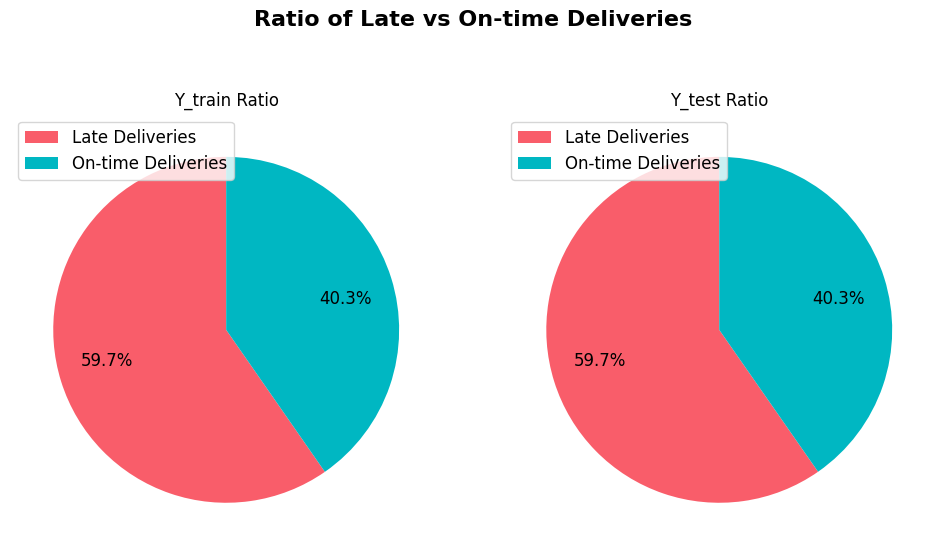

In [ ]:
# check ratio on on-time vs late deliveries

# Set color for each sector
colors = ['#f95d6a', '#00b7c2']

# Set title for each pie chart
title1 = 'Y_train Ratio'
title2 = 'Y_test Ratio'

# Create figure and set size
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create pie chart for Y_train
axs[0].set_title(title1)
pie1 = axs[0].pie(y_train.value_counts(), colors=colors, autopct='%.1f%%', startangle=90, 
                  textprops={'fontsize': 14, 'color': 'w'})
axs[0].legend(['Late Deliveries', 'On-time Deliveries'], loc='upper left', fontsize=12)

# Move label and percentage outside the sector
for text in pie1[2]:
    text.set_color('k')
    text.set_fontsize(12)
    text.set_horizontalalignment('center')
    text.set_position((1.2 * text.get_position()[0], text.get_position()[1]))

# Create pie chart for Y_test
axs[1].set_title(title2)
pie2 = axs[1].pie(y_test.value_counts(), colors=colors, autopct='%.1f%%', startangle=90, 
                  textprops={'fontsize': 14, 'color': 'w'})
axs[1].legend(['Late Deliveries', 'On-time Deliveries'], loc='upper left', fontsize=12)

# Move label and percentage outside the sector
for text in pie2[2]:
    text.set_color('k')
    text.set_fontsize(12)
    text.set_horizontalalignment('center')
    text.set_position((1.2 * text.get_position()[0], text.get_position()[1]))

# Add a title to the whole plot
fig.suptitle('Ratio of Late vs On-time Deliveries', fontsize=16, fontweight='bold', y=1.1)

plt.tight_layout(pad=1)
plt.show()

Based on the ratio of late vs on-time deliveries on both train and test data, the imbalance is negligible and treatment to the class imbalance is <b>not necessary</b>.

## 2.2 Feature Engineering

### 2.2.1 Feature Selection

In [ ]:
# drop kolom kategori yang asli, karena sudah di-encoding, 
x_train_new = x_train.copy()
x_train_new[target] = y_train

In [ ]:
x_train_new.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,gender_map,product_importance_map,Reached.on.Time_Y.N
count,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000
mean,4.063605,2.989341,210.496896,3.468080,12.828511,3633.641677,0.165046,0.168092,0.165281,0.167272,0.164812,0.161298,0.495959,0.597165,0.591777
std,1.138410,1.410399,48.112857,1.291307,15.413593,1637.248206,0.371244,0.373970,0.371455,0.373240,0.371033,0.367827,0.500013,0.638837,0.491534
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,170.000000,3.000000,4.000000,1840.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,215.000000,3.000000,7.000000,4157.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5040.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,310.000000,8.000000,62.000000,7846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


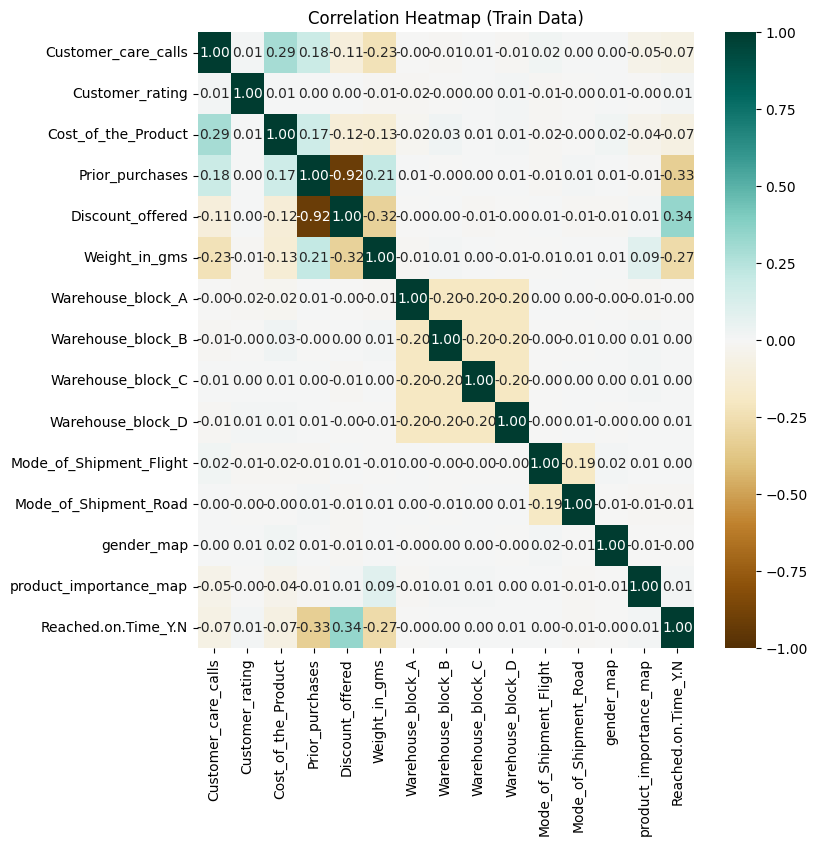

In [ ]:
# buat corr dari df x_train_new
# correlation heatmap berubah lagi?
plt.figure(figsize=(8, 8))
sns.heatmap(x_train_new.corr(method='spearman'), cmap='BrBG', annot=True, vmin=-1, vmax=1, fmt='.2f')

plt.title('Correlation Heatmap (Train Data)')
plt.show()

Setelah dilakukan pemeriksaan ulang korelasi antar fitur, ditemukan bahwa `Weight_in_gms` dengan `Discount_offered` dan `Cost_of_the_product` dengan `Customer_care_calls` memiliki korelasi yang cukup kuat.

Berdasarkan temuan tersebut, kedua kolom di atas dapat diekstrak menjadi suatu fitur baru yang merupakan gabungan dari kedua fitur untuk mencegah terjadinya multikolinearitas pada saat pembentukan model linear. Untuk model non-linear, semua variabel tersebut tetap dapat digunakan.

`Customer_rating`, `Warehouse_block`, `Mode_of_shipment`, dan `gender` memiliki korelasi yang sangat rendah terhadap semua fitur (kecuali fitur One-Hot lainnya), sehingga diduga aman untuk di-drop karena tidak akan mempengaruhi model.

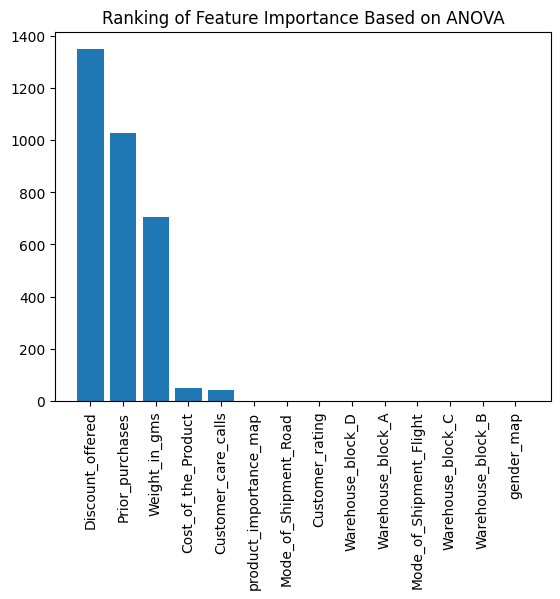

In [ ]:
# using ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10) # k is the number of features to be selected
x_train_new = selector.fit_transform(x_train, y_train)

columns = x_train.columns

feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(len(x_train.columns)):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores[i])[1])

plt.bar(col_list,num_list)
plt.xticks(rotation=90)
plt.title('Ranking of Feature Importance Based on ANOVA')

plt.show()

Berdasarkan nilai ANOVA fitur terhadap target, dapat diambil kesimpulan yang serupa dengan hasil uji korelasi; bahwa terdapat 5 fitur yang memiliki hubungan yang cukup terlihat terhadap target, dengan dua fitur mendominasi dibandingkan tiga fitur lainnya. 

Tanpa memilih terlebih dahulu jumlah fitur yang akan dipilih nantinya saat pembentukan model, secara garis besar pemilihan jumlah fitur dapat dibagi menjadi dua:

1. Menggunakan dua fitur, yaitu `Discount_offered` dan `Weight_in_gms`
2. Menggunakan lima fitur, dengan fitur diatas ditambah `Cost_of_the_product`, `Customer_care_calls`, dan `Prior_purchases`

### 2.2.2 Feature Extraction

Berdasarkan temuan pada bagian Feature Selection, kolom `Weight_in gms` dan `Discount_offered` yang memiliki korelasi cukup kuat dapat digabung menjadi satu fitur baru, atau salah satu fitur dapat di drop.

Untuk saat ini, tidak diperlukan feature extraction terlebih dahulu, karena jumlah fitur yang kemungkinan akan digunakan hanya sekitar 2 atau 5, sehingga kompleksitas dimensi tidak terlalu menjadi perhatian.

# 3. Machine Learning Modelling & Evaluation

## 3.1. Decision Tree (with grid search) - Mezky

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

selected_features = ['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product', 'Customer_care_calls', 'Prior_purchases']
dtree = DecisionTreeClassifier(random_state=42)

# hyperparameters for grid search
param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# grid search
gs = GridSearchCV(dtree, param, cv=5)
gs.fit(x_train[selected_features], y_train)

print(gs.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}


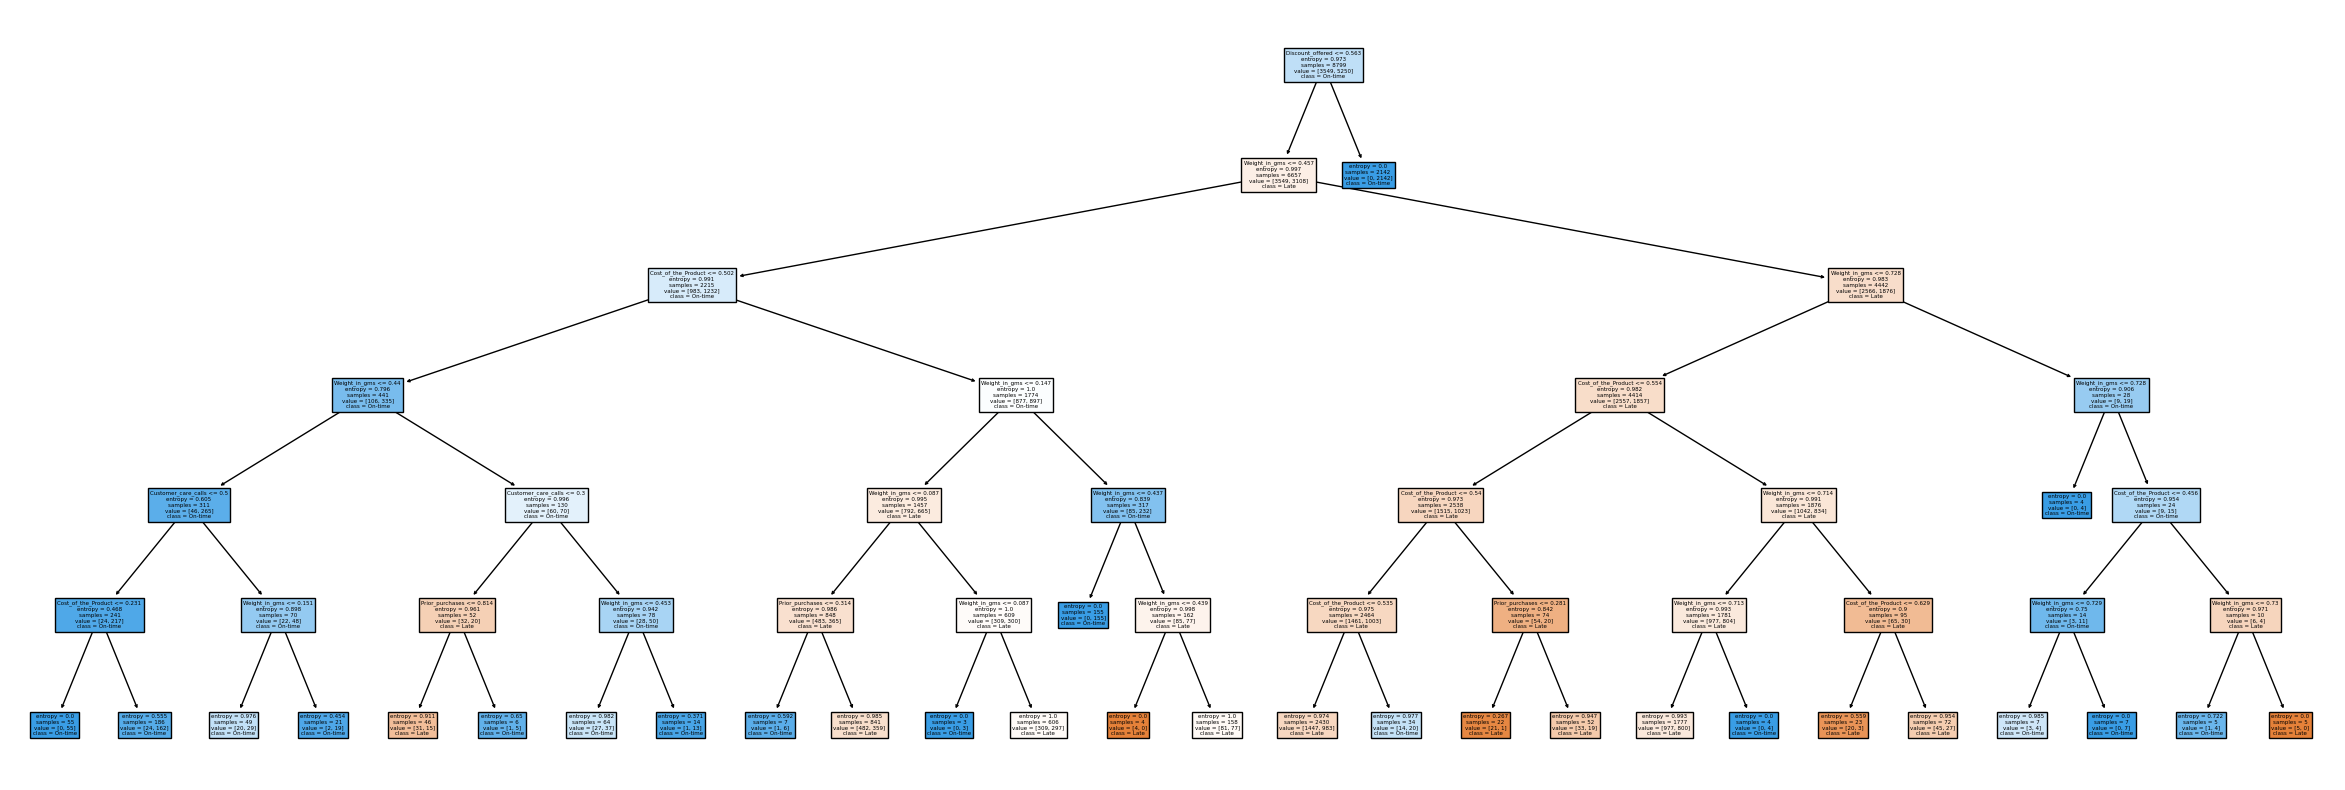

In [ ]:
# create decision tree with best parameters and visualize using plot tree
best_dtree = DecisionTreeClassifier(**gs.best_params_, random_state=42)
best_dtree.fit(x_train[selected_features], y_train)

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(best_dtree, feature_names=selected_features, class_names=['Late', 'On-time'], filled=True)

plt.show()

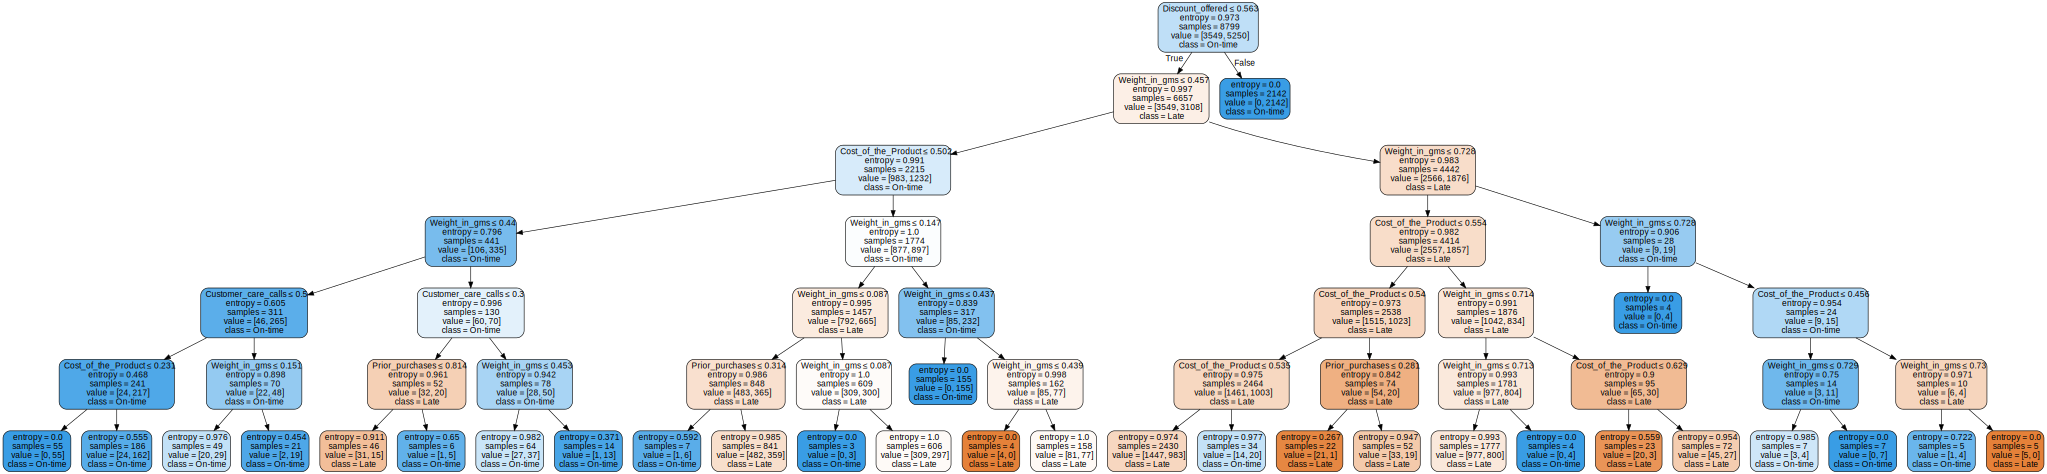

In [ ]:
# using graphviz
import graphviz 

dot_data = tree.export_graphviz(best_dtree, out_file=None, feature_names=selected_features, class_names=['Late', 'On-time'], filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 
graph

## 3.2.1 Random Forest (with GridSearch) - Rima

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

num = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
rf = RandomForestClassifier(random_state=42)

#hyperparameters
param = {
    'n_estimators': [100, 200],
    'max_depth': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 'auto'],
    'criterion': ['gini', 'entropy']
}

rfg = GridSearchCV(rf, param, cv=5)
rfg.fit(x_train[num], y_train)
    
#best hyperparameters
print(rfg.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
# Inisialisasi Model
rfc = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200)
rfc.fit(x_train[num], y_train)
eval_classification(rfc)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.95
Recall (Test Set): 0.48
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.79


## 3.2.2 Random Forest (Grid & Random dengan 1 hyperparameter) - Mufid

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators' : [100, 200],
    'criterion' : ['gini', 'mse', 'entropy'],
    'max_depth' : [None, 5, 10, 100],
    # 'min_samples_split' : [2, 10], #optional
    # 'min_samples_leaf' : [1, 5], #optional
    'max_features' : ['sqrt', 'log2', None, 'auto'],
    # 'bootstrap' :[True, False], #optional
    # 'random_state' : [25, 42] #optional
}
# masih bingung nentuin apa aja hyperparameters yang perlu dicantumin

# perform a grid search with cross-validation to find the best hyperparameters 
grid_search = GridSearchCV(rfc, param_grid, cv = 5)
grid_search.fit(x_train, y_train) # ini nggak bisa karena outlier di y_train nggak dibuang 

random_search = RandomizedSearchCV(rfc, param_grid, cv=5)
random_search.fit(x_train, y_train)

# print the best hyperparameters 
print('using grid search :', grid_search.best_params_)
print('using random search :',random_search.best_params_)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, jaccard_score, log_loss

rfc_grid = RandomForestClassifier(random_state=25, max_features= None, n_estimators=100, criterion='gini', max_depth=5) # mengikuti hasil dari best_params_
rfc_grid.fit(x_train, y_train)

In [ ]:
y_pred = rfc_grid.predict(x_test_transform) #x_test_transform belum dimasukkan 
print('Accuracy score :', round(accuracy_score(y_test, y_pred)*100, 2), '%')
print('/n')
print('F-1 Score :', (f1_score(y_test, y_pred, average='micro')))
print('Precision Score :', (precision_score(y_test, y_pred, average='micro')))
print('Recall Score :', (recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score :', (jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss :', (log_loss(y_test, y_pred)))

In [ ]:
# random
fc_random = RandomForestClassifier(random_state=25, max_features= 'sqrt', n_estimators=200, criterion='entropy', max_depth=5) # mengikuti hasil dari best_params_
rfc_random.fit(x_train, y_train)

In [ ]:
y_pred = rfc_random.predict(x_test_transform)
print('Accuracy score :', round(accuracy_score(y_test, y_pred)*100, 2), '%')
print('/n')
print('F-1 Score :', (f1_score(y_test, y_pred, average='micro')))
print('Precision Score :', (precision_score(y_test, y_pred, average='micro')))
print('Recall Score :', (recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score :', (jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss :', (log_loss(y_test, y_pred)))

## 3.3  Logistic Regression (With Random Search) - Syafiq (In Progress)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

num = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
lr = LogisticRegression (random_state=42)

#hyperparameters
param = {
    'penalty': ['l2', 'l1'],
    'max_iter': [100],
    'solver': ['lbfgs'],
    'C': [float(x) for x in np.linspace(0.0001, 1, 100)]
}

lrr = RandomizedSearchCV(lr, param, cv=5)
lrr.fit(x_train[num], y_train)
    
#best hyperparameters
print(lrr.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 0.7777999999999999}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#from sklearn.model_selection import cross_validate

num = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

def eval_classification(model):
    y_pred = model.predict(x_test[num])
    y_pred_train = model.predict(x_train[num])
    y_pred_proba = model.predict_proba(x_test[num])
    y_pred_proba_train = model.predict_proba(x_train[num])
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
lr = LogisticRegression() # inisiasi object dengan nama logreg
lr.fit(x_train[num], y_train) # fit model regression dari data train
eval_classification(lr)

Accuracy (Test Set): 0.40
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l2']
C = [float(x) for x in np.linspace(0.001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=100)
rs.fit(x_train[num], y_train)
eval_classification(rs)

Accuracy (Test Set): 0.40
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
show_best_hyperparameter(rs)

NameError: ignored

## 3.4 k-Nearest Neighbor (Uni) tapi masih error

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn

selected_features = ['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product', 'Customer_care_calls', 'Prior_purchases']
knn = KNeighborsClassifier() # inisiasi object dengan nama knn

# hyperparameters for grid search
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# grid search
gs = GridSearchCV(knn, param, cv=5)
gs.fit(x_train[selected_features], y_train)

print(gs.best_params_)



knn.fit(x_train, y_train) # fit model KNN dari data train
eval_classification(knn)

ValueError: ignored